# Moudular grid

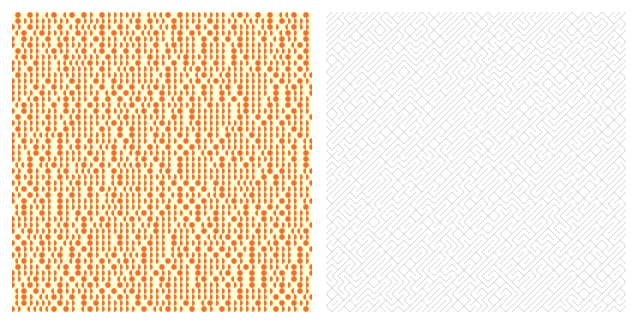

The instructions will allow you to recereate the "maze" on the right.

Before we start, as usual, we must import py5canvas to make things work. Execute the following cell:

In [6]:
from py5canvas import *


In the code below:

#### __1) Define the number of tiles__
```python
num_rows = 20
num_cols = 20
```
These will predefine the number of rows and columns in the tile grid. Note that if you want square tiles the respective ratio between the width and height of the canvas with `num_cols` and `num_rows` should be equal. In the case above these are the same because we will define a square canvas.

#### __2) Create a test tile function__
We will start by creating a function that we will use to test the tiled grid. Copy the following function inside the the cell that follows:
```python
def draw_tile(row, col, cell_width, cell_height):
    fill(255, 0, 0)
    circle(0, 0, cell_width/2)
```
For convenience in extensions you may want to make to this program, the function takes the `row`, the column (`col`) and the size (`cell_width` and `cell_height`) as parameters. We will not use these for now.
 
#### __4) Create a tile grid__
Define the number of rows and the number of columns for the tile grid:

Then calculate the width and height of each tile:
```Python
tile_width = width / num_cols
tile_height = height / num_rows
```

Create the canvas and set the background to white
```python
create_canvas(500, 500)
background(255)
```

We will draw each tile from the center so we shift our coordinate system to the center of each tile with:
```C
translate(tile_width / 2, tile_height / 2)
```
We could do that for each tile in the code that follows but if we do it first, we only need to do this once.

Now let's write the grid generating loop
```C
for i in range(num_rows):
    for j in range(num_cols):
        push_matrix()
        translate(tile_width * j, tile_height * i)
        draw_tile(i, j, tile_width, tile_height)
        pop_matrix()
```

And finally show the result with
```
show()
```

Note that we translate each tile to an $$x$$ position given by `tile_width*j` and a $$y$$ position given by `tile_height*i`.  We "wrap" each translation and the `draw_tile` call within a pair of `push_matrix` and `pop_matrix`, which allows us to set the position of a tile, and resetting it when we need to draw a new tile.

Having rows in the outer loop is pretty much a convention used when working with grids (e.g. matrices, images, arrays) because of the way they are typically laid out in memory, but the code will work identically if you switch the order of the two for loops.

If you run the cell now you should see an image of this sort



#### __3) Let's make this into maze__

First copy the contents of the code cell above this into the code cell below.

We will use random numbers to create the maze. Every time we run the code, a different maze will appear. If we want each maze to be the same, or we want this to appear the same each frame in an interactive sketch, we will need to "seed" the random number generator. 

Random numbers generated by a computer are called ["pseudo random numbers"](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) because they are produced by a number sequence generation algorithm that appears random, but actually starts from an initial value called a seed. Setting the seed ensures that the same sequence of apparently random numbers can be generated consistently. At the beginning of the cell insert this:

```python
seed = 12
random_seed(seed)
```

The code above will set a "seed" value that will result in all subsequent random numbers to follow the same sequence. After following the next step, changing the value of seed, will result in different sequence and in different visual results.

Now replace the contents of the custom `draw_tile` function with the following:
```python
choice = random_int(2) 
scale(0.5)
if choice == 0:
    line(-cell_width, -cell_height, cell_width, cell_height)
elif choice == 1:
    line(cell_width, -cell_height, -cell_width, cell_height)
```
And then run the cell. Note that we scale everything by 0.5 here, because we are drawing from the center of the tile so the corners on each side of a tile are half of the cell width.

#### __4) Modify and play at home!__

What else could you do? 

- Try to change the pattern in `draw_tile`
- Try to add more random cases instead of just 2
- Play with transformations in `draw_tile`. Effects can be achieved by letting the tiles overlap.
